In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

# CSV 파일 읽기
df = pd.read_csv('./dataset/illness/national_illness_orig.csv')


In [4]:
df_data = df.drop(columns=["date"])
df_data

,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,1.222620,1.166680,582,805,2060,754,176569
1,1.333440,1.216500,683,872,2267,785,186355
2,1.319290,1.130570,642,878,2176,831,192469
3,1.494840,1.252460,728,1045,2599,863,207512
4,1.471950,1.302370,823,1189,2907,909,223208
...,...,...,...,...,...,...,...
961,0.839059,0.846722,2756,3528,12913,3258,1525058
962,0.895958,0.908885,3203,3778,13979,3254,1538038
963,0.910926,0.941625,3478,3796,14389,3177,1528103
964,0.946945,0.972185,3734,3818,14999,3066,1542813


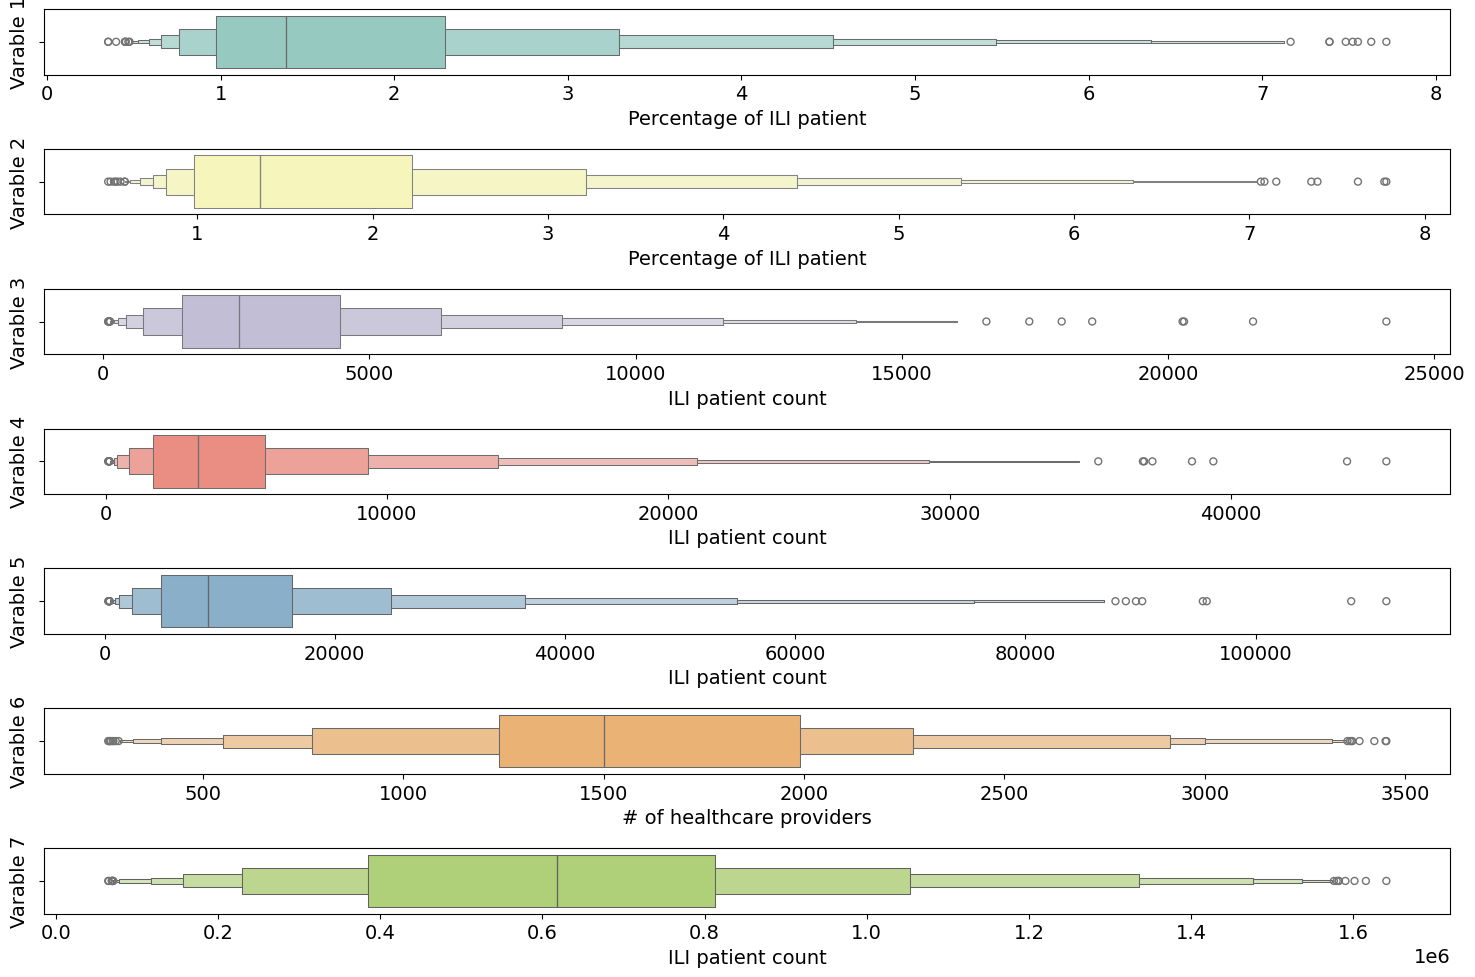

In [10]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})

# 색상 팔레트 설정
colors = sns.color_palette("Set3", len(df_data.columns))

# 각 열에 대해 boxen plot 그리기
num_columns = len(df_data.columns)
for i, (column, color) in enumerate(zip(df_data.columns, colors), 1):
    plt.subplot(num_columns, 1, i)
    sns.boxenplot(data=df_data, x=column, color=color)
    # plt.title(f'Boxen Plot for {column}')/
    if i == 1:
        plt.xlabel('Percentage of ILI patient')
    elif i == 2:
        plt.xlabel('Percentage of ILI patient')
    elif i == 6:
        plt.xlabel('# of healthcare providers')
    else:
        plt.xlabel('ILI patient count')
    plt.ylabel('Varable '+str(i))

# 플롯 간 간격 조정
plt.tight_layout()

# 플롯 보여주기

plt.savefig('national2.png')
plt.show()

In [11]:
df = pd.read_csv('./dataset/ILI/ILI_region_feature_1997-2020.csv')


In [12]:
df

,0,1,2,3,4,5,6,7,8,9
0,44,3,32,46,89,5,27,5,243,76
1,57,2,42,44,104,6,15,9,274,62
2,85,1,46,54,186,6,13,3,241,46
3,125,1,32,17,222,7,16,8,214,11
4,73,14,22,43,272,11,12,8,224,21
...,...,...,...,...,...,...,...,...,...,...
1174,2732,12428,5007,6006,2392,3543,533,1196,1015,1240
1175,2025,7476,3904,4229,1941,2350,344,827,736,905
1176,1883,4448,3175,3166,1659,1712,247,551,578,607
1177,1284,2763,2989,2794,1655,1569,243,529,514,610


In [15]:
variable_names = {
    '0': 'Region 1',
    '1': 'Region 2',
    '2': 'Region 3',
    '3': 'Region 4',
    '4': 'Region 5',
    '5': 'Region 6',
    '6': 'Region 7',
    '7': 'Region 8',
    '8': 'Region 9',
    '9': 'Region 10'
}

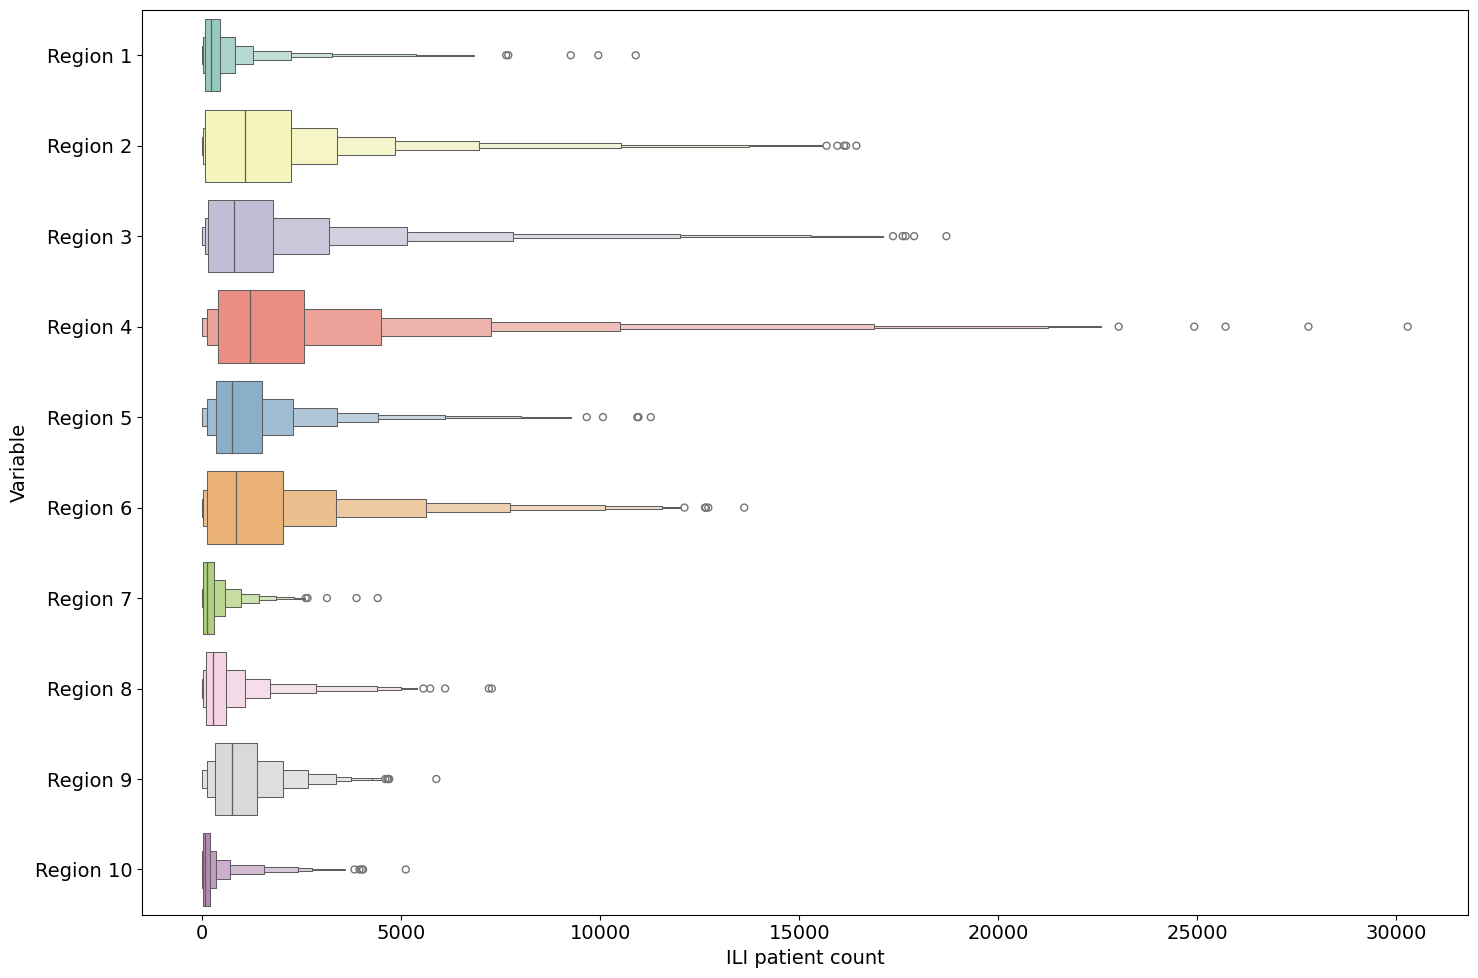

In [16]:
df_melted = df.melt(var_name='Variable', value_name='Value')

df_melted['Variable'] = df_melted['Variable'].astype(str).map(variable_names)

# 전체 데이터를 하나의 boxen plot으로 그리기
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})
sns.boxenplot(data=df_melted, x='Value', y='Variable', hue='Variable', palette="Set3")
# plt.title('Boxen Plot for All Variables')
plt.xlabel('ILI patient count')
# plt.ylabel('Variable')
plt.tight_layout()

plt.savefig('regional_boxen plot.png')
# 플롯 보여주기
plt.show()